In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import scatterplot_solution_1, scatterplot_solution_2

In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head().T

,0,1,2,3,4
id,32204,32205,32206,32207,32208
make,Nissan,Volkswagen,Volkswagen,Volkswagen,Chevrolet
model,GT-R,CC,CC,CC 4motion,Malibu eAssist
year,2013,2013,2013,2013,2013
VClass,Subcompact Cars,Compact Cars,Compact Cars,Compact Cars,Midsize Cars
drive,All-Wheel Drive,Front-Wheel Drive,Front-Wheel Drive,All-Wheel Drive,Front-Wheel Drive
trans,Automatic (AM6),Automatic (AM-S6),Automatic (S6),Automatic (S6),Automatic (S6)
fuelType,Premium Gasoline,Premium Gasoline,Premium Gasoline,Premium Gasoline,Regular Gasoline
cylinders,6,4,6,6,4
displ,3.8,2,3.6,3.6,2.4


### **TO DO 1**: 
Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). **Use a _scatter plot_ to depict the data.**
1. What is the general relationship between these variables? 
2. Are there any points that appear unusual against these trends?

Text(0,0.5,'Highway')

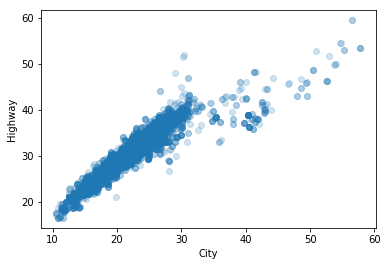

In [3]:
# YOUR CODE HERE
plt.scatter(data=fuel_econ,x="city",y="highway", alpha=1/5)
plt.xlabel("City")
plt.ylabel("Highway")

### Expected Output

Most of the data falls in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Some transparency is added via 'alpha' to show the concentration of data. Interestingly, for most cars highway mileage is clearly higher than city mileage, but for those cars with city mileage above about 30 mpg, the distinction is less pronounced. In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend. It might be good to call out this trend by adding a diagonal line to the figure using the `plot` function. (See the solution file for that code!)


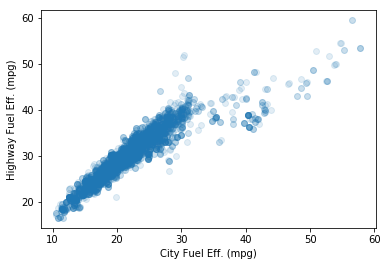

In [4]:
# run this cell to check your work against ours
scatterplot_solution_1()

### **TO DO 2**: 
Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). **Use a heat map to depict the data.** How strong is this trend?

In [5]:
# YOUR CODE HERE

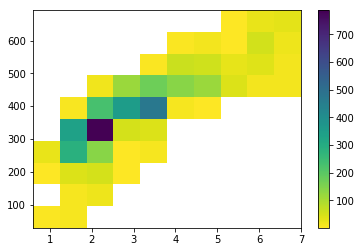

In [6]:
plt.hist2d(data=fuel_econ,x="displ",y="co2", cmin=1, cmap="viridis_r")
plt.colorbar()
#plt.set_cmap("hot")

In [7]:
describe = fuel_econ[ ["displ","co2"] ].describe()
describe

,displ,co2
count,3929.000000,3929.000000
mean,2.950573,376.564266
std,1.305901,92.338892
min,0.600000,29.000000
25%,2.000000,315.000000
50%,2.500000,369.000000
75%,3.600000,429.000000
max,7.000000,692.000000


In [8]:
describe.loc["min","displ"]

0.59999999999999998

In [9]:
bins_x = np.arange(0, describe.loc["max","displ"]+0.4, 0.4) # np.arange(describe.loc["min","displ"], describe.loc["max","displ"]+0.4, 0.4)
bins_y = np.arange(0, describe.loc["max","co2"]+50, 50)
bins_x, bins_y

(array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.]))

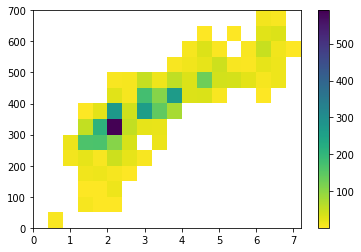

In [10]:
plt.hist2d(data=fuel_econ,x="displ",y="co2", cmin=1, cmap="viridis_r",bins=[bins_x, bins_y])
plt.colorbar()
#plt.set_cmap("hot")

In [11]:
bins_x = np.arange(describe.loc["min","displ"], describe.loc["max","displ"]+0.4, 0.4)
bins_y = np.arange(0, describe.loc["max","co2"]+50, 50)
bins_x, bins_y

(array([ 0.6,  1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,
         5. ,  5.4,  5.8,  6.2,  6.6,  7. ]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.]))

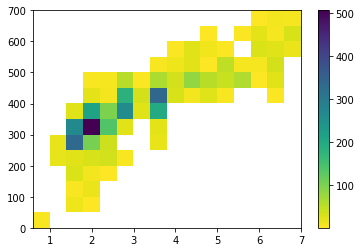

In [12]:
plt.hist2d(data=fuel_econ,x="displ",y="co2", cmin=1, cmap="viridis_r",bins=[bins_x, bins_y])
plt.colorbar()

### Expected Output

In the heat map, I've set up a color map that goes from light to dark, and made it so that any cells without count don't get colored in. The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions. The trend is somewhat broken by those cars with the lowest emissions, which still have engine sizes shared by most cars (between 1 and 3 liters).


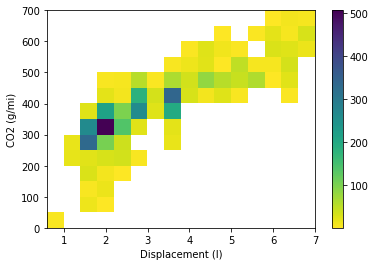

In [13]:
# run this cell to check your work against ours
scatterplot_solution_2()